In [1]:
%matplotlib widget
import sys
sys.path.append("../src")

import numpy as np
import matplotlib.pyplot as plt

from SensorTasking import SSA_Problem, greedy_search, search
from SensorTasking.compute_coefficients import compute_coefficients, solve_model_maxmin
from plotting import render, plot_orbits, visualize_info_vs_phase

In [2]:
# L2 Halo orbit, period = 3.225 TU  (Target orbit)
x0_1 = np.array([
        1.1540242813087864,
        0.0,
        -0.1384196144071876,
        4.06530060663289e-15,
        -0.21493019200956867,
        8.48098638414804e-15
    ])
# same L2 halo but phase = 1/2
x0_10 = np.array([1.06097909e+00,  1.07560735e-10,  7.34778975e-02, -1.44739818e-10,
         3.41397240e-01, -3.07924681e-10])
# same L2 halo but phase = 1/3
x0_13 = np.array([1.0806927 , -0.12323006, -0.00757954, -0.07789012,  0.07947237,
         0.21008552])

# L1 lyapunov, period = 3.225 TU (target orbit)
x0_2 = np.array([
        0.8027692908754149,
        0.0,
        0.0,
        -1.1309830924549648e-14,
        0.33765564334938736,
        0.0
    ])
# L1 lyapunov, period = 3.225 TU (target orbit) but phase = 0.25
x0_11 = np.array([0.87865254, 0.16826693, 0.        , 0.12091167, 0.00891463,
        0.        ])

# L1 lyapunov, period = 3.225 TU (target orbit) but phase = 0.75
x0_12 = np.array([ 0.87865255, -0.16826693,  0.        , -0.12091164,  0.00891462,
         0.        ])


# 1:1 L2 Lyapunov, period = 6.45 TU (observer orbit)
x0_3 = np.array([
        0.9982702689023665,
        0.0,
        0.0,
        -2.5322340091977996e-14,
        1.5325475708886613,
        0.0
    ])

# 1:1 L1 Lyapunov, period = 6.45 TU (observer orbit)
x0_4 = np.array([
            0.65457084231188,
        0.0,
        0.0,
        3.887957091335523e-13,
        0.7413347560791179,
        0.0
])


# 2:1 Resonant, period = 6.45 TU
x0_5 = np.array([
        0.9519486347314083,
        0.0,
        0.0,
        0.0,
        -0.952445273435512,
        0.0
    ])

# 3:1 Resonant, period = 6.45 TY
x0_6 = np.array([
        0.13603399956670137,
        0.0,
        0.0,
        1.9130717669166003e-12,
        3.202418276067991,
        0.0
    ])

# L2 Lyapunov, period = 3.7132531304869154 TU
x0_9 = np.array([
    	1.0636292377522296E+0,
        -3.1952388095755208E-28,	
        9.6105846729337803E-36,	
        4.8862169349265717E-15,	
        4.6223063293086447E-1,	
        -9.4408653291941199E-34
])


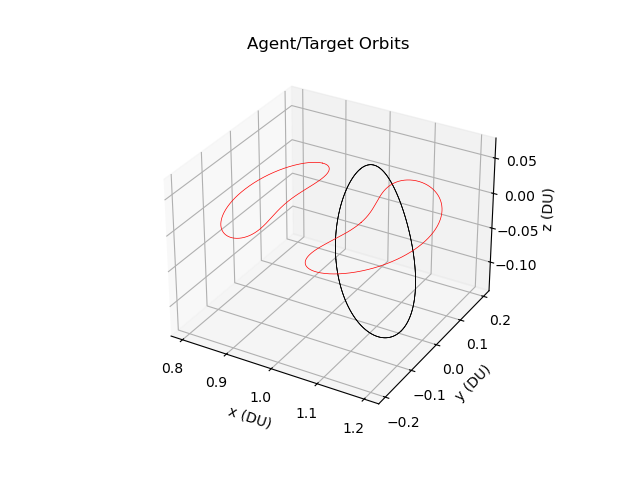

In [3]:
opt = "maxmin"
Y = np.array([x0_10, x0_1, x0_13])
Y_periods = np.array([3.225, 3.225, 3.225])

X = np.array([x0_11, x0_9])
X_periods = np.array([3.225, 3.7132531304869154])

prob = SSA_Problem(target_ics=Y.tolist(),
                   target_periods=Y_periods.tolist(),
                   agent_ics=X.tolist(),
                   agent_periods=X_periods.tolist(),
                   opt=opt)
plot_orbits(prob, fig=10, projection="3d")

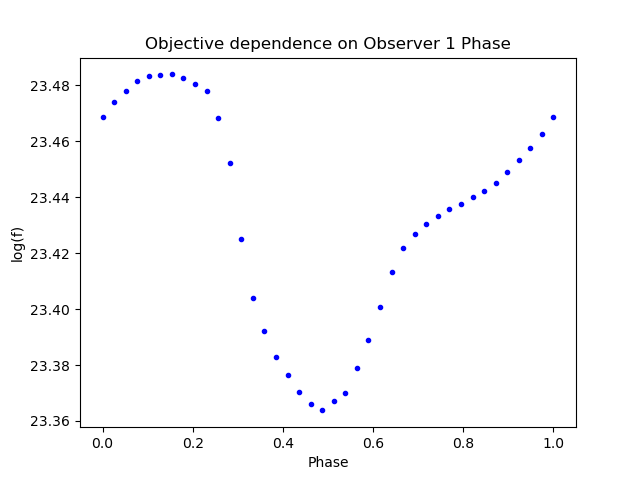

In [4]:
plt.figure(1)
# phases = np.linspace(0.385, 0.3865, 40)
phases = np.linspace(0., 1.0, 40)
visualize_info_vs_phase(prob, phases, observer=1, fig=1, fixed_phases=[0.6])

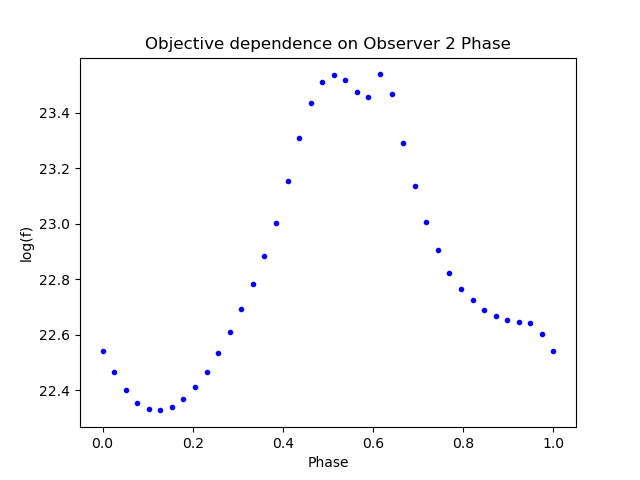

In [5]:
plt.figure(2)
# phases = np.linspace(0.385, 0.3865, 40)
phases = np.linspace(0., 1.0, 40)
visualize_info_vs_phase(prob, phases, observer=2, fig=2, fixed_phases=[0.1])

In [6]:
coef = compute_coefficients(prob.env)
control, obj= solve_model_maxmin(coef)
print(f"{opt} obj = {obj}")

maxmin obj = 6154637494.620734


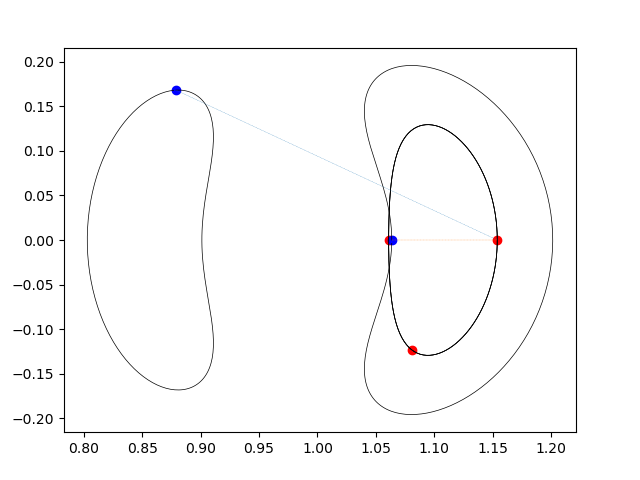

In [7]:
ani = render(prob, x=[0.0, 0.0], fig=11, control=control)

In [8]:
phases, control, objective = greedy_search(Y, Y_periods, X, X_periods, init_phase_guess=[[0.06], [0.6]], opt=opt)
print("algorithm: "  "greedy")
print(f"obj type: ", opt)
print("log obj ", np.log(objective))
print("phases ", phases)

Beginning Optimization...

Finished in 4.953121662139893 sec.
algorithm: greedy
obj type:  maxmin
log obj  23.47900417830451
phases  [0.06550750891575445, 0.6209338520482971]


In [9]:
phs, ctrl, obj = search(Y, Y_periods, X, X_periods, init_phase_guess=[[0.06, 0.6]], opt=opt)
print("algorithm: ", "exact")
print(f"obj type: ", opt)
print("log obj ", np.log(obj))
print("phases ", phs)

Beginning Optimization...

Finished in 40.266831159591675 sec.
algorithm:  exact
obj type:  maxmin
log obj  23.542042481100157
phases  [0.10164550525698152, 0.6192772601743591]


In [10]:
np.where(ctrl != control)

(array([ 0,  0,  1,  1,  2,  2,  4,  4,  5,  5,  8,  8,  9,  9,  9,  9, 10,
        10, 11, 11, 12, 12, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19,
        20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28,
        28, 30, 30, 32, 32, 33, 33, 34, 34, 35, 35]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 1,
        0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
        1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2]))